In [2]:
import pandas as pd
import numpy as np

In [78]:
data = pd.read_csv('recs2009_public.csv')

C:\Users\USER7\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


### 5 columns as object

In [80]:
# check the object columns
obj = data.dtypes =='object'
obj_columns = data.columns[obj]
data[obj_columns]

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
0,METRO,U,-2,-2,4A
1,METRO,U,-2,-2,3C
2,METRO,U,-2,-2,5A
3,METRO,U,-2,-2,5A
4,METRO,U,-2,-2,5A
...,...,...,...,...,...
12078,METRO,U,-2,-2,6A-6B
12079,METRO,U,-2,-2,3B-4B
12080,METRO,U,-2,-2,6A-6B
12081,METRO,U,-2,-2,5B-5C


In [81]:
data.UR.unique() # categorical

array(['U', 'R'], dtype=object)

In [82]:
data.IECC_Climate_Pub.unique() # categorical

array(['4A', '3C', '5A', '6A-6B', '1A-2A', '3B-4B', '3A', '5B-5C',
       '7A-7B-7AK-8AK', '2B', '4C'], dtype=object)

In [83]:
data.METROMICRO.unique() # categorical

array(['METRO', 'MICRO', 'NONE'], dtype=object)

In [164]:
# check if that "none" values effective or shall will drop it.
data.METROMICRO.value_counts() 

METRO    10300
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64




........................

####  Decided to not drop 672 observation, will keep it as a category.



......................

#### Checking the reason of showing numerical data as object (null, or unknown values).


.........

In [85]:
data.NOCRCASH.unique() # '.' to be change to null, column to be converted to int

array([-2, 1, 6, 15, 4, '-2', '1', '20', '.', '12', '4', '10', '3', '24',
       '55', '6', 8, 28, 5, 55, 3, 16, 2, 20, 10, 24, 40, 12, 25],
      dtype=object)

In [86]:
data.NKRGALNC.unique() # '.' to be change to null, column to be converted to int

array([-2, 1, 5, 10, '-2', '10', '15', '1', '8', '.', '5', '3', '2', '77',
       30, 3, 15, 8, 55, 2, 20], dtype=object)

In [87]:
# convert '.' to nan, in order to make it easy to deal with it.
data.NKRGALNC = [np.nan if data.NKRGALNC[i] =='.'  else data.NKRGALNC[i] for i in range(len(data.NKRGALNC))]
data.NOCRCASH = [np.nan if data.NOCRCASH[i] =='.'  else data.NOCRCASH[i] for i in range(len(data.NOCRCASH))]

In [88]:
# checking null values in the whole data
null = data.isnull().sum()>0
null_col = data.columns[null]
data[null_col]

,NOCRCASH,NKRGALNC
0,-2,-2
1,-2,-2
2,-2,-2
3,-2,-2
4,-2,-2
...,...,...
12078,-2,-2
12079,-2,-2
12080,-2,-2
12081,-2,-2




.......................................................................................

#### Only 2 columns has null values.
In order to keep only categorical columns in our obj_columns mask:
1. Drop null.
2. Convert those colunms to numarical.
3. Recall the object mask.

........................................................................................


In [394]:
# Drop the null values.

data = data.dropna()


# Change the numerical columns in the object mask to 'int' type.

for col in data[obj_columns]:
    try:
        data[col] = data[col].astype('int64')
    except ValueError:
        data[col].dtypes =='object' 

In [90]:
# Recall the object mask to keep only the categorical data columns.
obj = data.dtypes =='object'
obj_columns = data.columns[obj]
data[obj_columns]

,METROMICRO,UR,IECC_Climate_Pub
0,METRO,U,4A
1,METRO,U,3C
2,METRO,U,5A
3,METRO,U,5A
4,METRO,U,5A
...,...,...,...
12078,METRO,U,6A-6B
12079,METRO,U,3B-4B
12080,METRO,U,6A-6B
12081,METRO,U,5B-5C


In [160]:
from sklearn.preprocessing import LabelEncoder
# Transforming the categorical data.
le = LabelEncoder()
df = data.copy()
for col in df[obj_columns]:
    df['_'.join([col, 'enc'])] = le.fit_transform(df[col]).astype('int64')

In [204]:
# drop the original categorical columns after capture copy.
new_df = df.copy()
new_df = new_df.drop(df[obj_columns], axis=1) 

In [205]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DOEID,12081.0,6042.712110,3488.052612,1.0,3023.0,6043.0,9063.0,12083.0
REGIONC,12081.0,2.628590,1.042018,1.0,2.0,3.0,3.0,4.0
DIVISION,12081.0,5.373727,2.859161,1.0,3.0,5.0,7.0,10.0
REPORTABLE_DOMAIN,12081.0,14.785779,8.194842,1.0,8.0,15.0,21.0,27.0
TYPEHUQ,12081.0,2.659217,1.192346,1.0,2.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
DesignDBT99,12081.0,20.258753,15.337719,-23.0,9.0,18.0,33.0,67.0
DesignDBT1,12081.0,90.359407,6.167176,60.0,87.0,90.0,94.0,118.0
METROMICRO_enc,12081.0,0.203046,0.522580,0.0,0.0,0.0,0.0,2.0
UR_enc,12081.0,0.799106,0.400685,0.0,1.0,1.0,1.0,1.0


In [206]:
# outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False).head(20)

<ipython-input-206-fdf665141551>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False).head(20)
<ipython-input-206-fdf665141551>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False).head(20)


DVD2            5479
CABLESAT1       5385
CRAWL           5111
COOLTYPE        4798
EQUIPM          4520
WELLPUMP        4242
PLAYSTA2        4128
DRYRUSE         4101
TOPFRONT        3989
DIGITSTB2       3944
COMBOVCRDVD2    3808
ELECCHRG        3757
NUMTHERM        3705
VCR2            3696
TVONWD2         3532
TVAUDIOSYS2     3011
NUMFRIG         2916
AGERFRI1        2897
AGERFRI2        2897
SIZRFRI2        2897
dtype: int64

In [207]:
# Showing the skewed columns
skew_limit = 0.75 
skew_vals = new_df.skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
ZSTOVEN,109.913602
ZDIFFUEL,109.913602
ZOTHERWAYLPG,109.913602
ZPCTATTHT,109.913602
ZFREEZER2,109.913602
...,...
PIPELESS,-4.767704
MICRO,-4.786991
HEATHOME,-4.912410
REFRIGT1,-5.378657


### There are a lot of outliers, and data containing many skewed columns:
#### Taking log will be better.

In [256]:
#The data containing zero values and negative values. need to add value with log.

new_df = new_df.apply(lambda x: np.log(x+25))

In [263]:
# checking if any value transformed to be null after log.
null_values = new_df.isnull().sum()>0
null_col = new_df.columns[null_values]
new_df[null_col]

""
0
1
2
3
4
...
12078
12079
12080
12081


................


### Will avoid using feature Selection, our reduce the data dimension as we not going to use tuning, or searchcv, in order to make the model more faster to run.

### As we will not use PCA, the high correlated columns with our target value must be removed.

...................


### Checking the correlations

In [376]:
# split the target
X = new_df.drop('KWH', axis=1)
y = new_df['KWH']

In [370]:
cor = (new_df['KWH'])
fields = list(new_df.drop('KWH', axis=1))
correlations = new_df[fields].corrwith(cor)
correlations.sort_values(inplace=True)
correlations

TYPEHUQ    -0.421689
STUDIO     -0.416409
NAPTFLRS   -0.402087
KAVALNG    -0.343339
PERIODNG   -0.341559
              ...   
DOLELOTH    0.762269
BTUELOTH    0.882814
KWHOTH      0.882864
DOLLAREL    0.905530
BTUEL       0.999963
Length: 939, dtype: float64

In [426]:
correlations_sample = [correlations.sort_values(ascending=False)[:12]]
correlations_sample

[BTUEL          0.999963
 DOLLAREL       0.905530
 KWHOTH         0.882864
 BTUELOTH       0.882814
 DOLELOTH       0.762269
 TOTALBTUOTH    0.727717
 TOTALDOLOTH    0.707762
 KWHRFG         0.658025
 BTUELRFG       0.649707
 TOTALBTURFG    0.649703
 TOTALDOL       0.645611
 KWHCOL         0.580204
 dtype: float64]

In [415]:
# Mask for removing the high correlated columns with target column.
hh = correlations[correlations>0.6]
hg = hh.index
X = X.drop(X[hg], axis=1)

In [418]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# using dmatrix for acclaimed performance
data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [419]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [420]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:25:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [421]:
# checking the mean squared error, it's high as we didn't use any tuning tool
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

3.0569744176109275

### Finding the most effective feature in our target

In [422]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return xgb.plot_importance(booster=booster, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

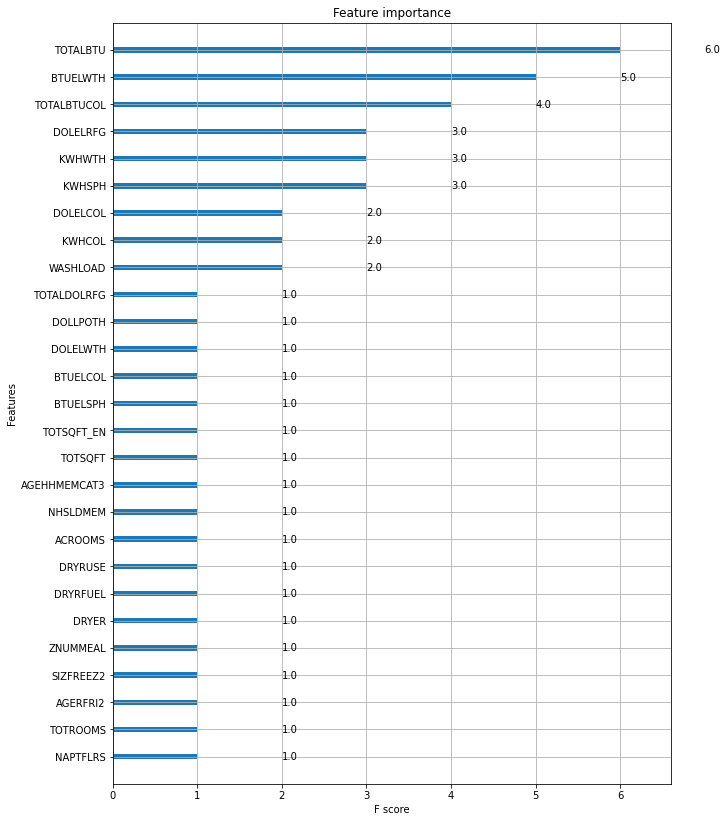

In [423]:
plot_features(xg_reg, (10,14))

## Analysis Report Summary

### Predicting the Total Site Electricity usage in kilowatt-hours, and find how to reduce the consumption from the most effective feature:

#### * 9 features, is the most effective feature in Total Site Electricity usage in kilowatt-hours, 2009 (KWH) values.



#### 1. Total usage in thousand BTU, 2009 (TOTLBTU) on top of the most effective feature in Total Site Electricity usage in kilowatt-hours, 2009 (KWH), 
Note: that point is not giving sense, need to double check the correlation columns.

#### 2. then LPG/Propane usage for water heating, in thousand BTU, 2009 (BTULWTH) is the second effective feature in KWH.
#### 3. Total usage for air conditioning, in thousand BTU, 2009 having also great effect in the Total Site Electricity usage, in kilowatt-hours which is give sense.
#### 4. in the fourth level, we have some feature affecting equally in the Total Site Electricity usage, in kilowatt-hours.
#### •	Electricity cost for refrigerators, in whole dollars, 2009 (DOLELRFG).
#### •	Electricity usage for water heating, in kilowatt-hours, 2009 (KWHWTH).
#### •	Electricity usage for space heating, in kilowatt-hours, 2009 (KWHSPH).
#### 5. in the fifth level, we have some feature affecting equally in the Total Site Electricity usage, in kilowatt-hours.
#### •	Electricity cost for air-conditioning, central and window/wall (room), in whole dollars, 2009 (DOLELCOL).
#### •	Electricity usage for air-conditioning, central and window/wall (room), in kilowatt-hours, 2009 (KWHCOL).
#### •	Frequency clothes washer used (WASHLOAD)

### Final findings:

### We can see in the graph some other effective points or feature, if we would reduce the consumption of that points or feature, or reduce the consumption of the first most effective features, that will be a great solution for reducing the total Site Electricity usage in kilowatt-hours.
